# Capstone: Data Wrangling/Cleaning

In this section I will be wrangling and cleaning the data. This section would typically involve some form of webscraping application but since I'll be using the dataset provided by http://www.rovit.ua.es/dataset/traffic/ that will not be necessary.
Also given that I will be working with a image dataset, there won't be any need for typical cleaning methods such as filling in NaNs and converting data types.

In [1]:
#imports that will be used in this notebook
from PIL import Image
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

#histograms of colour.

In [27]:
#this function will check how many files are the right extension type
def check_extension(path):
    #use glob to count number of jpg files
    jpg = glob.glob(path + '/*.jpg')
    
    #use glob to count all files
    all_files = glob.glob(path + '/*')
    
    #glob can't be used to exclude files
    #loop through all files and create a list of all files that are not jpg
    not_jpg = []
    for file_path in all_files:
        if file_path in jpg:
            pass
        else: not_jpg.append(file_path)
    
    #if any files that are not jpg are found, change the extension to .jpg
    if len(not_jpg) != 0:
        for img_path in not_jpg:
            pre, ext = os.path.splitext(img_path)
            os.rename(img_path, pre + '.jpg')
            print("Converting {} to {}".format(img_path, pre + '.jpg'))
            
    print("There are {} files that are jpegs and {} files were converted into jpeg.".format(len(jpg), len(not_jpg)))

In [24]:
def check_empty(path):
    for file_path in glob.glob(path + '/*'):
        img = Image.open(file_path)
        
        #convert image to greyscale and get the min and max values
        extrema = img.convert("L").getextrema()
        
        #check if image is all black
        if extrema == (0,0):
            print("{} is all black, deleting image.".format(file_path))
            os.remove(file_path)
            
        #check if image is all white
        if extrema == (1,1):
            print("{} is all white, deleting image.".format(file_path))
            os.remove(file_path)
            
        #check if image has no size
        img = cv2.imread(file_path)
        if img.shape[:2] == (0,0):
            print("{} has no data, deleting image.".format(file_path))
            os.remove(file_path)

In [29]:
#this function will display the number of each type of file 
def count_images(path):
    #create dictionary to keep track of number of each image
    samples = {'bicycle':0,'bus':0,'car':0,'motorbike':0,'person':0,'trafficsignal':0,'traficlight':0,}
    
    #use glob to count number of each type of file
    samples['bus'] = len(glob.glob(path + '/bus*.jpg'))
    samples['bicycle'] = len(glob.glob(path + '/bicycle*.jpg'))
    samples['car'] = len(glob.glob(path + '/car*.jpg'))
    samples['motorcycle'] = len(glob.glob(path + '/motorbike*.jpg'))
    samples['person'] = len(glob.glob(path + '/pedestrian*.jpg'))
    samples['trafficsignal'] = len(glob.glob(path + '/trafficsignal*.jpg'))
    samples['trafficlight'] = len(glob.glob(path + '/trafficlight*.jpg'))
    
    #plot values and fix x-axis labels so they don't overlap
    fig, ax = plt.subplots()
    ax.bar(samples.keys(), samples.values())
    fig.autofmt_xdate()
    
    plt.show()
    
    #count the total number of images
    total = 0
    for sample in samples:
        total += samples[sample]
    print("There are {} sample images in total.".format(total))


In [19]:
#this function will get the average length and width of all the files
def get_avg_size(path):
    length = []
    width = []
    
    #loop through all files recording their lengths and widths
    for img_path in glob.glob(path + '/*'):
        img = cv2.imread(img_path)
        x, y = img.shape[:2]
        length.append(x)
        width.append(y)
        
    #return the average length and width
    return np.average(length), np.average(width)

718.7342192691029
1205.5946843853822


In [35]:
#this function will load the images from the dataset directory and save the modified images in a new directory
def load_process_image(path):
    #load image
    img = Image.open(path)
    
    # create path to save files to
    edited_path = "edited_images/final_{}.jpg".format(path.stem)

    # output to monitor the process
    print("Modifying {} and saving results to {}.".format(path, edited_path))
    
    # converting image into greyscale
    grey_img = img.convert("L")
    
    # resizing image to 720 X 1200 pixels based on the averages already calculated
    final_image = grey_img.resize((720, 1200))
    
    # saving final image in new directory
    final_image.save(edited_path)

In [25]:
#define path
path = 'Capstone/Dataset/SampleFiles/'

In [26]:
#check for all black, white or empty files
check_empty(path)

In [28]:
#check file extensions
check_extension(path)

There are 301 files that are jpegs and 0 files were converted into jpeg.


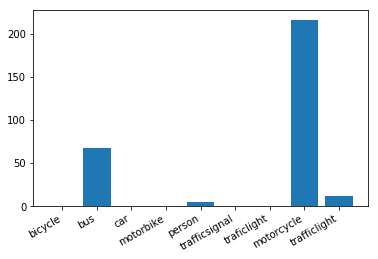

There are 301 sample images in total.


In [30]:
#count the remain number of images
count_images(path)

In [34]:
#get the average length and width for resizing
x, y = get_avg_size(path)
print("The average dimensions of all the files is ({0:.2f},{1:.2f})".format(x,y))

The average dimensions of all the files is (718.73,1205.59)


In [37]:
# for loop over image paths
for img_path in glob.glob(path + '*.jpg'):
    load_process_image(Path(img_path))

Modifying Capstone\Dataset\SampleFiles\bus_internet09_026837.jpg and saving results to edited_images/final_bus_internet09_026837.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_026881.jpg and saving results to edited_images/final_bus_internet09_026881.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_026925.jpg and saving results to edited_images/final_bus_internet09_026925.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027010.jpg and saving results to edited_images/final_bus_internet09_027010.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027054.jpg and saving results to edited_images/final_bus_internet09_027054.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027098.jpg and saving results to edited_images/final_bus_internet09_027098.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027142.jpg and saving results to edited_images/final_bus_internet09_027142.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_027194.j

Modifying Capstone\Dataset\SampleFiles\bus_internet09_031009.jpg and saving results to edited_images/final_bus_internet09_031009.jpg.
Modifying Capstone\Dataset\SampleFiles\bus_internet09_031055.jpg and saving results to edited_images/final_bus_internet09_031055.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000007.jpg and saving results to edited_images/final_motorbike_internet01_000007.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000061.jpg and saving results to edited_images/final_motorbike_internet01_000061.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000111.jpg and saving results to edited_images/final_motorbike_internet01_000111.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000179.jpg and saving results to edited_images/final_motorbike_internet01_000179.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet01_000223.jpg and saving results to edited_images/final_motorbike_internet01_000223.jpg.
Mo

Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002277.jpg and saving results to edited_images/final_motorbike_internet04_002277.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002341.jpg and saving results to edited_images/final_motorbike_internet04_002341.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002398.jpg and saving results to edited_images/final_motorbike_internet04_002398.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002442.jpg and saving results to edited_images/final_motorbike_internet04_002442.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002498.jpg and saving results to edited_images/final_motorbike_internet04_002498.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002544.jpg and saving results to edited_images/final_motorbike_internet04_002544.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet04_002595.jpg and saving results to edited_images/final_motorbike_i

Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_001654.jpg and saving results to edited_images/final_motorbike_internet06_001654.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_001717.jpg and saving results to edited_images/final_motorbike_internet06_001717.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_001761.jpg and saving results to edited_images/final_motorbike_internet06_001761.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_001805.jpg and saving results to edited_images/final_motorbike_internet06_001805.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_001849.jpg and saving results to edited_images/final_motorbike_internet06_001849.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_001939.jpg and saving results to edited_images/final_motorbike_internet06_001939.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet06_002014.jpg and saving results to edited_images/final_motorbike_i

Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001393.jpg and saving results to edited_images/final_motorbike_internet08_001393.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001483.jpg and saving results to edited_images/final_motorbike_internet08_001483.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001527.jpg and saving results to edited_images/final_motorbike_internet08_001527.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001571.jpg and saving results to edited_images/final_motorbike_internet08_001571.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001615.jpg and saving results to edited_images/final_motorbike_internet08_001615.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001659.jpg and saving results to edited_images/final_motorbike_internet08_001659.jpg.
Modifying Capstone\Dataset\SampleFiles\motorbike_internet08_001703.jpg and saving results to edited_images/final_motorbike_i

Just for demostration purposes, we can now see one of the original images and its modified version.

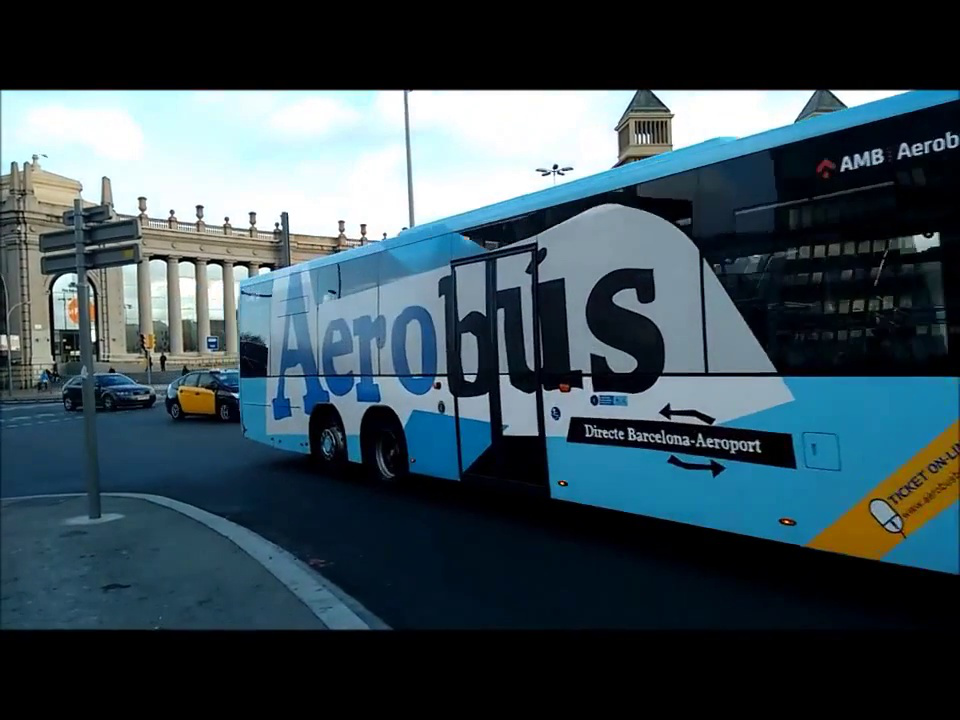

In [38]:
#first the original image
filename = 'bus_internet09_026925'
img = Image.open('Capstone/Dataset/SampleFiles/{}.jpg'.format(filename))
img

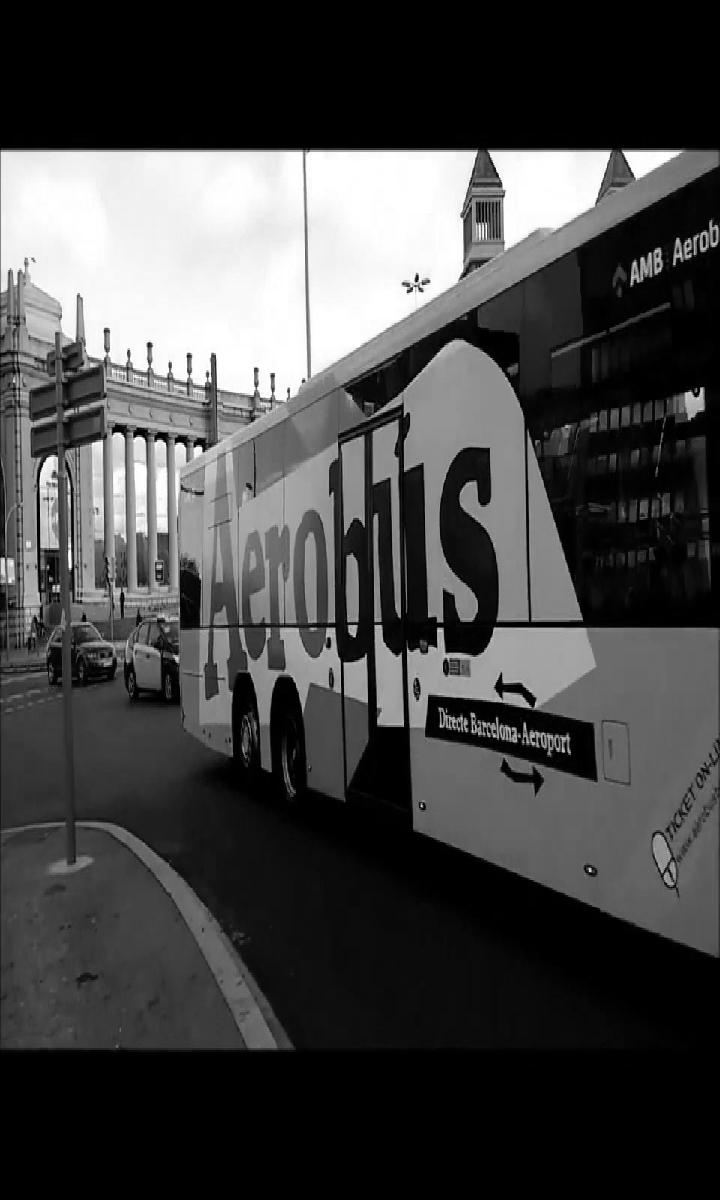

In [39]:
# Now the modified verision
img_mod = Image.open('edited_images/final_{}.jpg'.format(filename))
img_mod